**Tabla de contenido**

- [Definiendo el proceso autorregresivo](#Definiendo-el-proceso-autorregresivo)
- [Encontrar el orden de un proceso autoregresivo estacionario](#Encontrar-el-orden-de-un-proceso-autoregresivo-estacionario)
    - [La función de autocorrelación parcial (PACF)](#La-funcion-de-autocorrelacion-parcial-(PACF))
- [Pronosticando un proceso autorregresivo](#Pronosticando-un-proceso-autorregresivo)

En este capítulo, primero definiremos el proceso autorregresivo. Luego, definiremos la función de autocorrelación parcial y la utilizaremos para encontrar el orden del proceso autorregresivo subyacente de un conjunto de datos. Finalmente, utilizaremos el modelo AR(p) para producir pronósticos.

# Definiendo el proceso autorregresivo

`Un proceso autorregresivo establece que la variable de salida depende linealmente de sus propios valores anteriores`. En otras palabras, es una regresión de la variable contra sí misma.

Un proceso autorregresivo se denomina proceso AR(p), donde p es el orden. En tal proceso, el valor presente $y_t$ es una combinación lineal de una constante $C$, el término de error presente $ϵ_t$, que también es ruido blanco, y los valores pasados de la serie $y_{t–p}$.

La magnitud de la influencia de los valores pasados sobre el valor presente se denota como $ϕp$, que representa los coeficientes del modelo AR(p). Matemáticamente, expresamos un modelo AR(p) con la siguiente ecuación: $$y_t = C + ϕ_1y_{t–1} + ϕ_2y_{t–2} +⋅⋅⋅ ϕ_py_{t–p} + ϵ_t$$

Al igual que con un proceso de media móvil, debemos encontrar el orden correcto de un proceso autorregresivo para construir el modelo apropiado. Esto significa que si identificamos un proceso AR(3), utilizaremos un modelo autorregresivo de tercer orden para hacer pronósticos.

# Encontrar el orden de un proceso autoregresivo estacionario

Al igual que con el proceso de media móvil, hay una manera de determinar el orden p de un proceso autoregresivo estacionario.

1. `El primer paso natural es recopilar los datos`.
2. Trazaremos nuestros datos para ver si hay algún patrón observable, como una tendencia o estacionalidad.
3. `Comprobar la estacionariedad`.
4. `Aplicar la primera diferenciación`.
5. Con una transformación aplicada a la serie, podemos verificar si la serie es estacionaria ejecutando la prueba ADF en la serie diferenciada.
6. El siguiente paso es graficar la ACF y ver si hay autocorrelación y si los coeficientes se vuelven abruptamente no significativos después de un cierto retraso.
7. Cuando el gráfico de ACF de un proceso estacionario exhibe un patrón de decaimiento exponencial, probablemente tengamos un proceso autorregresivo en juego, y debemos encontrar otra forma de identificar el orden p del proceso AR(p). Específicamente, debemos dirigir nuestra atención al gráfico de la función de autocorrelación parcial (PACF).


In [1]:
# Lectura de datos
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

path_file = lambda file: os.path.join(os.getcwd(),'data',file)
df = pd.read_csv(path_file('foot_traffic.csv'))

Veamos la serie de tiempo.

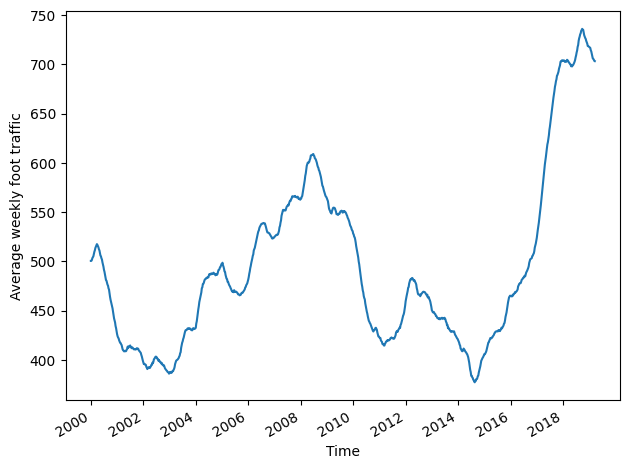

In [2]:
fig, ax = plt.subplots()
ax.plot(df['foot_traffic'])
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()

Al observar la figura, notarás que no hay un patrón cíclico, por lo que podemos descartar la presencia de estacionalidad. En cuanto a la tendencia, a veces es positiva y a veces negativa a lo largo de los años, siendo la tendencia más reciente positiva desde 2016.

`El siguiente paso es comprobar la estacionariedad`. Como se mencionó antes, la presencia de una tendencia significa hace que la serie probablemente no sea estacionara. Verifiquemos eso utilizando la prueba ADF.

In [3]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['foot_traffic'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619


Esto imprime una estadística ADF de -1.18 junto con un valor p de 0.68. Dado que la estadística ADF no es un número negativo grande y tiene un valor p mayor que 0.05, no podemos rechazar la hipótesis nula y, por lo tanto, nuestra `serie es no estacionaria`.

Por lo tanto, debemos aplicar una transformación para hacerlo estacionario. Para eliminar el efecto de la tendencia y estabilizar la media de la serie, utilizaremos la diferenciación.

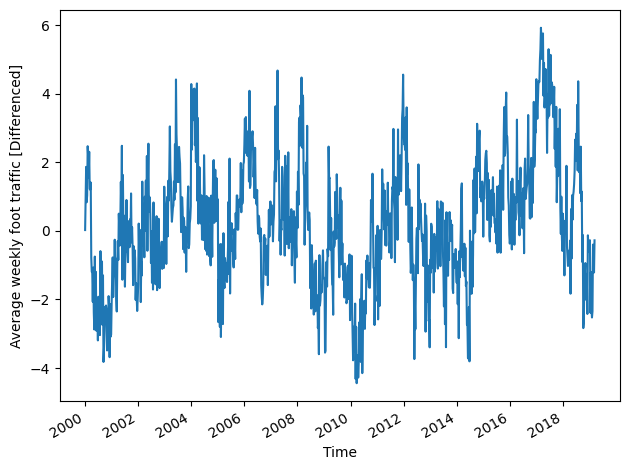

In [4]:
foot_traffic_diff = np.diff(df['foot_traffic'], n=1)

fig, ax = plt.subplots()
ax.plot(foot_traffic_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic [Differenced]')
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()

Con una transformación aplicada a la serie, podemos verificar si la serie es estacionaria al realizar la prueba ADF sobre la serie diferenciada.

In [5]:
ADF_result = adfuller(foot_traffic_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06


Esto imprime una estadística ADF de -5.27 y un valor p de 6.36×10–6. Con un valor p menor que 0.05, podemos rechazar la hipótesis nula, lo que significa que ahora tenemos una serie estacionaria.

`El siguiente paso es graficar la ACF` y ver si hay autocorrelación y si los coeficientes se vuelven abruptamente no significativos después de un cierto retraso.

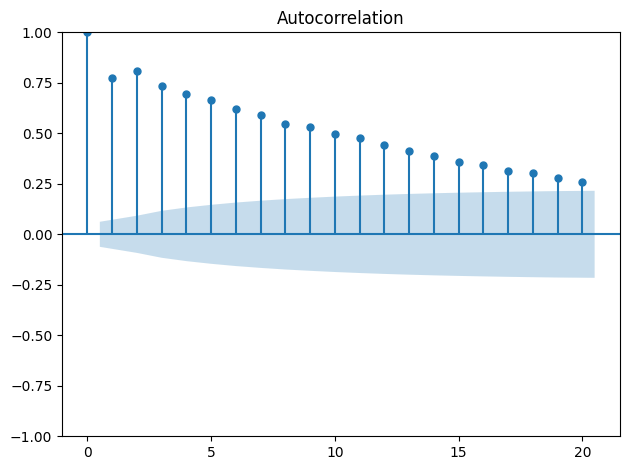

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(foot_traffic_diff, lags=20);
plt.tight_layout()

Fíjate en cómo el gráfico está decayendo lentamente. Este es un comportamiento que no hemos observado antes, y es indicativo de un proceso autorregresivo.

Al observar la figura, notarás que tenemos coeficientes de autocorrelación significativos más allá del rezago 0. Por lo tanto, sabemos que nuestro proceso no es una caminata aleatoria. Además, notarás que los coeficientes están decayendo exponencialmente a medida que aumenta el rezago. Por lo tanto, no hay un rezago en el que los coeficientes se vuelvan abruptamente no significativos. Esto significa que no tenemos un proceso de media móvil y que es probable que estemos estudiando un proceso autorregresivo.

`Cuando el gráfico de ACF de un proceso estacionario exhibe un patrón de decaimiento exponencial`, probablemente tengamos un proceso autorregresivo en juego, y debemos encontrar otra forma de identificar el orden p del proceso AR(p). Específicamente, debemos dirigir nuestra atención al gráfico de la función de autocorrelación parcial (PACF).


## La funcion de autocorrelacion parcial (PACF)

En un intento de identificar el orden de un proceso autorregresivo estacionario, utilizamos el gráfico ACF tal como lo hicimos para un proceso de media móvil. Desafortunadamente, el gráfico ACF no puede brindarnos esta información, y debemos recurrir a la `función de autocorrelación parcial (PACF)`.

Recuerda que la autocorrelación mide la relación lineal entre los valores rezagados de una serie de tiempo. En consecuencia, `la función de autocorrelación mide cómo cambia la correlación entre dos valores a medida que se aumenta el rezago`.

Para entender la función de autocorrelación parcial, consideremos el siguiente escenario. Supongamos que tenemos el siguiente proceso AR(2): $$y_t = 0.33y_{t–1} + 0.50y_{t–2}$$
Deseamos medir cómo $y_t$ se relaciona con $y_{t–2}$; en otras palabras, queremos medir su correlación. Esto se hace con la función de autocorrelación (FAC). Sin embargo, a partir de la ecuación, podemos ver que $y_{t–1}$ también tiene una influencia en $y_t$. Aún más importante, también tiene un impacto en el valor de $y_{t–2}$, ya que en un proceso AR(2), cada valor depende de los dos valores anteriores.

Por lo tanto, cuando medimos la autocorrelación entre $y_t$ y $y_{t–2}$ utilizando la ACF, `no estamos teniendo en cuenta` el hecho de que $y_{t–1}$ tiene influencia tanto en $y_t$ como en $y_{t–2}. Esto significa que no estamos midiendo el verdadero impacto de $y_{t–2} en $y_t$.

Para hacerlo, debemos eliminar el efecto de $y_{t–1}$. Así, estamos midiendo la autocorrelación parcial entre $y_t$ y $y_{t–2}$.

En términos más formales, `la autocorrelación parcial mide la correlación entre los valores rezagados en una serie temporal cuando eliminamos la influencia de los valores rezagados correlacionados entre sí`. Esos se conocen como variables de confusión. La función de autocorrelación parcial revelará cómo varía la autocorrelación parcial a medida que aumenta el rezago.

Verifiquemos si graficar la PACF revelará el orden del proceso mostrado en la anterior ecuación. Sabemos por la ecuación que tenemos un proceso autorregresivo de segundo orden, o AR(2). Lo simularemos utilizando la función ArmaProcess de statsmodels. La función espera un arreglo que contenga los coeficientes de un proceso MA(q) y un arreglo que contenga los coeficientes para un proceso AR(p). Dado que solo estamos interesados en simular un proceso AR(2), estableceremos los coeficientes del proceso MA(q) en 0.

Luego, tal como se especifica en la documentación de statsmodels, los coeficientes del proceso AR(2) deben tener signos opuestos a los que deseamos simular. Por lo tanto, el arreglo contendrá -0.33 y -0.50. Además, la función requiere que incluyamos el coeficiente en el rezago 0, que es el número que multiplica $y_t$. Aquí, ese número es simplemente 1.

Una vez que se definen los arreglos de coeficientes, podemos alimentarlos a la función ArmaProcess, y generaremos 1,000 muestras. Asegúrate de establecer la semilla aleatoria en 42 para poder reproducir los resultados mostrados aquí.


In [7]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(42)
ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

Ahora que tenemos un proceso AR(2) simulado, tracemos el PACF y veamos si los coeficientes se vuelven abruptamente no significativos después del rezago 2. Si ese es el caso, sabremos que podemos usar el gráfico del PACF para determinar el orden de un proceso autorregresivo estacionario, así como podemos usar el gráfico del ACF para determinar el orden de un proceso de media móvil estacionario.

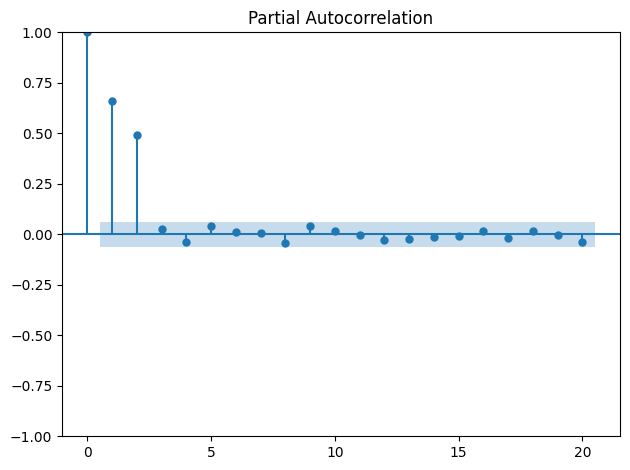

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(AR2_process, lags=20);
plt.tight_layout()

El gráfico resultante se muestra en la figura 5.7, y muestra que tenemos un proceso autorregresivo de orden 2.

Ahora sabemos que podemos usar el gráfico PACF para identificar el orden de un proceso AR(p) estacionario. Los coeficientes en el gráfico PACF serán significativos hasta el rezago p. Después de eso, no deberían ser significativamente diferentes de 0.

`Veamos si podemos aplicar la misma estrategia a nuestro conjunto de datos de tráfico peatonal promedio semanal`. Hicimos que la serie fuera estacionaria y vimos que el gráfico de ACF mostraba una tendencia de decaimiento lento. Ploteemos el PACF para ver si los rezagos se vuelven no significativos después de un rezago particular

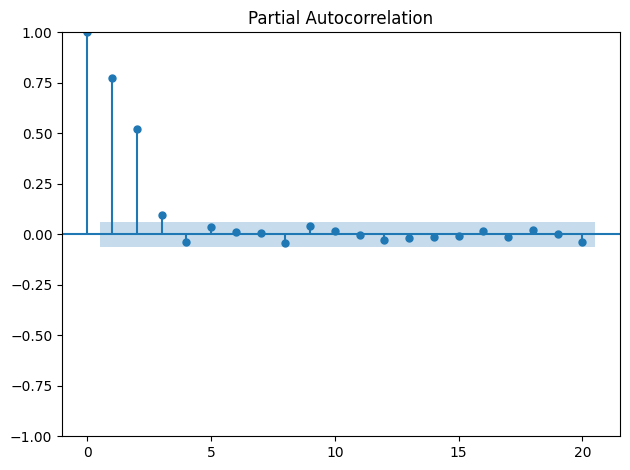

In [9]:
plot_pacf(foot_traffic_diff, lags=20);
plt.tight_layout()

Al observar la figura, `se puede ver que no hay coeficientes significativos después del rezago 3`. Por lo tanto, el tráfico peatonal promedio semanal diferenciado es un `proceso autorregresivo de orden 3`, que también se puede denotar como AR(3).


# Pronosticando un proceso autorregresivo

Una vez que se determina el orden, podemos ajustar un modelo autorregresivo para predecir nuestra serie temporal. En este caso, el modelo también se denomina AR(p), donde p sigue siendo el orden del proceso.

Pronosticaremos el tráfico peatonal promedio de la próxima semana en una tienda minorista utilizando el mismo conjunto de datos con el que hemos estado trabajando. Para evaluar nuestras previsiones, reservaremos las últimas 52 semanas de datos para nuestro conjunto de prueba, mientras que el resto se utilizará para el entrenamiento. De esa manera, podemos evaluar el rendimiento de nuestra previsión durante un período de 1 año.

In [10]:
df_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})
train = df_diff[:-52]
test = df_diff[-52:]
print(len(train))
print(len(test))

947
52


Puedes ver que nuestro conjunto de entrenamiento contiene 947 puntos de datos, mientras que el conjunto de prueba contiene 52 puntos de datos como se esperaba. Ten en cuenta que la suma de ambos conjuntos da 999, que es un punto de dato menos que nuestra serie original. Esto es normal, ya que aplicamos diferenciación para hacer que la serie sea estacionaria, y sabemos que la diferenciación elimina el primer punto de datos de la serie.

A continuación, visualizaremos el período de prueba para nuestro escenario, tanto en la serie original como en la serie diferenciada. El gráfico se muestra en la figura.

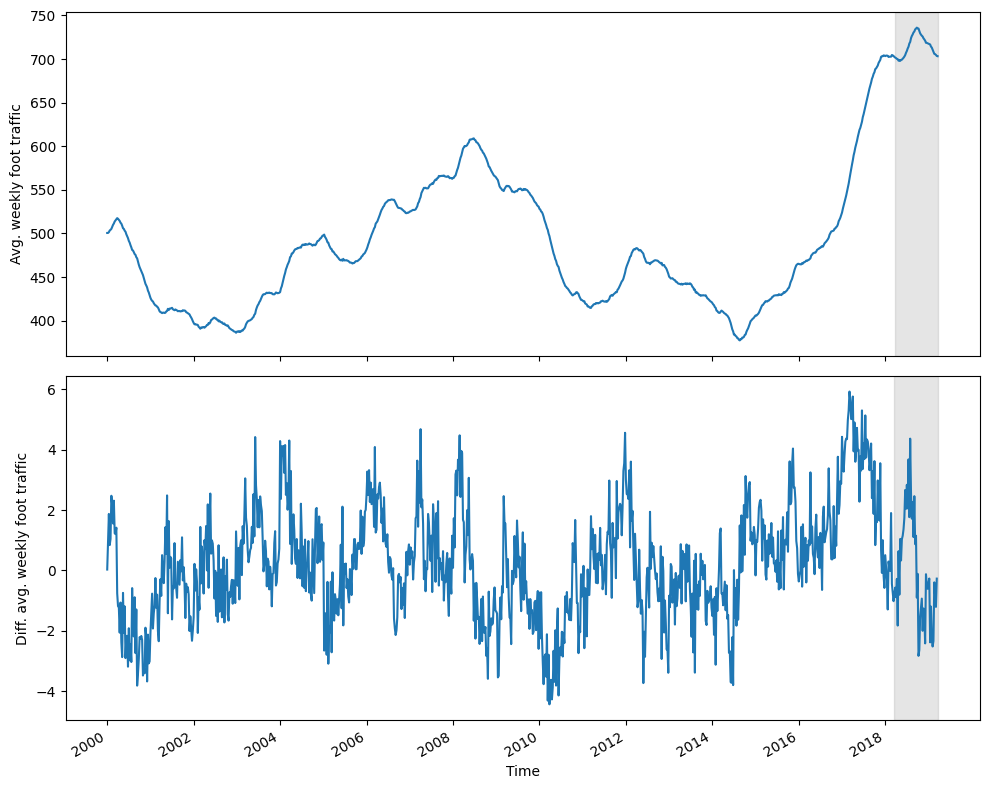

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10, 8))
ax1.plot(df['foot_traffic'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. weekly foot traffic')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)
ax2.plot(df_diff['foot_traffic_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Diff. avg. weekly foot traffic')
ax2.axvspan(947, 999, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))
fig.autofmt_xdate()
plt.tight_layout()

Dado que nuestro objetivo es pronosticar el tráfico promedio de personas en la tienda minorista para la próxima semana, realizaremos pronósticos rodantes sobre nuestro conjunto de prueba. Recuerda que nuestros datos fueron registrados durante un período semanal, así que predecir el próximo paso de tiempo significa que estamos pronosticando el tráfico promedio de personas para la próxima semana.

Pronosticaremos utilizando tres métodos diferentes. El método de la media histórica y el método del último valor conocido actuarán como bases de referencia, y utilizaremos un modelo AR(3), ya que previamente establecimos que tenemos un proceso autorregresivo de tercer orden estacionario. Como hicimos en el capítulo anterior, utilizaremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada método de pronóstico.

Además, reutilizaremos la función que definimos en el capítulo anterior para realizar pronósticos de manera recursiva durante el período de prueba. Sin embargo, esta vez debemos incluir un método para utilizar un modelo autorregresivo.

Usaremos nuevamente la función SARIMAX de statsmodels, ya que abarca un modelo AR. Como se mencionó anteriormente, SARIMAX es un modelo complejo que nos permite considerar efectos estacionales, procesos autorregresivos, series temporales no estacionarias, procesos de media móvil y variables exógenas, todo en un solo modelo. Por ahora, descartaremos todos los factores excepto la parte autorregresiva móvil.

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,window: int, method: str) -> list:
    total_len = train_len + horizon
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    
    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'AR':
        pred_MA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA

Una vez que nuestra función esté definida, podemos usarla para generar las predicciones de acuerdo a cada método. Les asignaremos su propia columna en la prueba.

In [13]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1
pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW,'last')
pred_AR = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

In [14]:
test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR
test.head()

/tmp/ipykernel_7821/254886343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_mean'] = pred_mean
/tmp/ipykernel_7821/254886343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_last_value'] = pred_last_value
/tmp/ipykernel_7821/254886343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,foot_traffic_diff,pred_mean,pred_last_value,pred_AR
947,-0.776601,0.213270,-1.021893,-0.719714
948,-0.574631,0.212226,-0.776601,-0.814547
949,-0.890697,0.211397,-0.574631,-0.664738
950,-0.283552,0.210237,-0.890697,-0.641469
951,-1.830685,0.209717,-0.283552,-0.579279


Ahora podemos visualizar nuestras predicciones en comparación con los valores observados en el conjunto de prueba. Tenga en cuenta que estamos trabajando con la serie diferenciada, por lo que nuestras predicciones también son valores diferenciados.

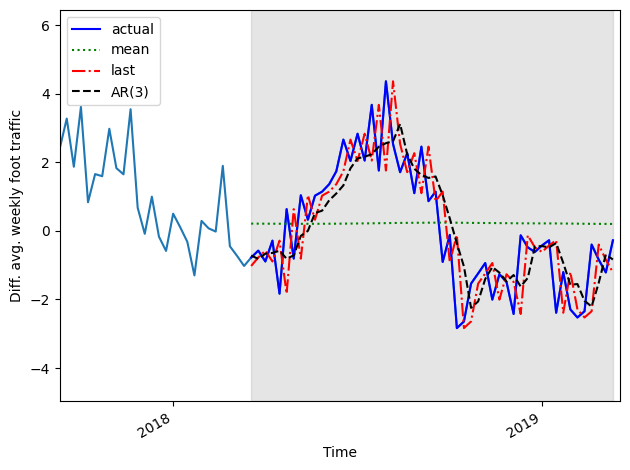

In [15]:
fig, ax = plt.subplots()
ax.plot(df_diff['foot_traffic_diff'])
ax.plot(test['foot_traffic_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_AR'], 'k--', label='AR(3)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Diff. avg. weekly foot traffic')
ax.axvspan(947, 998, color='#808080', alpha=0.2)
ax.set_xlim(920, 999)
plt.xticks([936, 988],[2018, 2019])
fig.autofmt_xdate()
plt.tight_layout()

Al observar la figura, verás que, una vez más, utilizar la media histórica produce una línea recta, que se muestra en la gráfica como una línea de puntos. En cuanto a las predicciones del modelo AR(3) y el método del último valor conocido, las curvas se confunden casi completamente con las del conjunto de prueba, por lo que tendremos que medir el MSE para evaluar qué método es el más eficiente. Nuevamente, utilizaremos la función mean_squared_error de la biblioteca sklearn.

In [16]:
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['foot_traffic_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['foot_traffic_diff'],test['pred_last_value'])
mse_AR = mean_squared_error(test['foot_traffic_diff'], test['pred_AR'])
print(mse_mean, mse_last, mse_AR)

3.1079979374701447 1.448730118495964 0.924247916284841


Esto imprime un MSE de 3.11 para el método de media histórica, 1.45 para el método del último valor conocido y 0.92 para el modelo AR(3). Dado que el MSE para el modelo AR(3) es el más bajo de los tres, concluimos que el modelo AR(3) es el método de mejor rendimiento para predecir el tráfico peatonal promedio de la próxima semana. Esto es esperado, ya que establecimos que nuestro proceso estacionario era un proceso autorregresivo de orden tres. Tiene sentido que modelar utilizando un modelo AR(3) producirá las mejores predicciones.

Dado que nuestras previsiones son valores diferenciados, necesitamos revertir la transformación para volver nuestras previsiones a la escala original de los datos; de lo contrario, nuestras predicciones no tendrán sentido en un contexto empresarial. Para hacer esto, podemos tomar la suma acumulativa de nuestras predicciones y sumarla al último valor de nuestro conjunto de entrenamiento en la serie original. Este punto ocurre en el índice 948, ya que estamos pronosticando las últimas 52 semanas en un conjunto de datos que contiene 1,000 puntos.

In [17]:
df['pred_foot_traffic'] = pd.Series()
df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + test['pred_AR'].cumsum()

/tmp/ipykernel_7821/3875516694.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + test['pred_AR'].cumsum()
/tmp/ipykernel_7821/3875516694.py:2: SettingWithCopyWarning: 
A value 

Text(0.5, 0, 'Time')

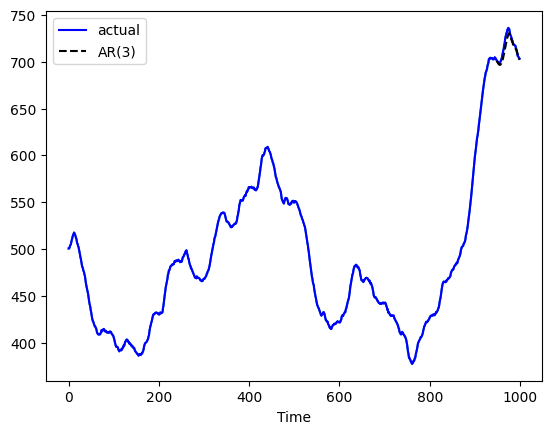

In [18]:
fig, ax = plt.subplots()
ax.plot(df['foot_traffic'])
ax.plot(df['foot_traffic'], 'b-', label='actual')
ax.plot(df['pred_foot_traffic'], 'k--', label='AR(3)')
ax.legend(loc=2)
ax.set_xlabel('Time')